In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('price_rent_department_in_hanoi.csv')
data.head()

,Đường/Phố,Xã/Phường/Thị Trấn,Quận/Huyện,Diện tích,Giá,Số tầng,Số phòng ngủ,Số toilet
0,Nguyễn Hoàng,Mỹ Đình 1,Nam Từ Liêm,55.0,32.0,7.0,NaN,NaN
1,Tô Ngọc Vân,Quảng An,Tây Hồ,200.0,160.0,NaN,NaN,NaN
2,Xóm Chùa,Quảng An,Tây Hồ,400.0,28.0,NaN,NaN,NaN
3,Võ Chí Công,Nghĩa Đô,Cầu Giấy,125.0,75.0,NaN,NaN,NaN
4,Mạc Thái Tông,Trung Hòa,Cầu Giấy,95.0,45.0,4.0,NaN,NaN


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Đường/Phố           1463 non-null   object 
 1   Xã/Phường/Thị Trấn  1463 non-null   object 
 2   Quận/Huyện          1463 non-null   object 
 3   Diện tích           1463 non-null   float64
 4   Giá                 1429 non-null   float64
 5   Số tầng             1218 non-null   float64
 6   Số phòng ngủ        898 non-null    float64
 7   Số toilet           812 non-null    float64
dtypes: float64(5), object(3)
memory usage: 91.6+ KB


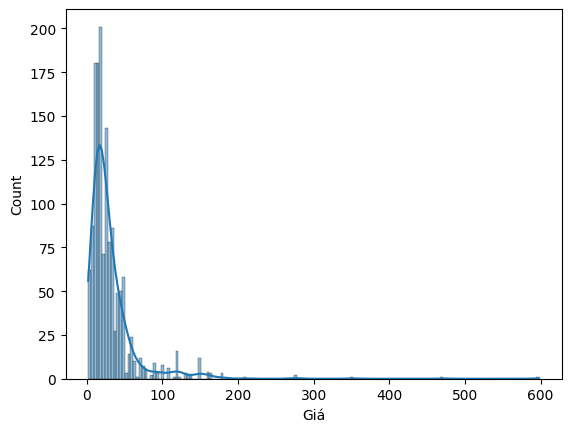

In [98]:
sns.histplot(x='Giá',data=data,kde=True)
plt.show()

In [99]:
feature = np.array(data.columns.to_list())

In [100]:
nan_val_col = feature[np.array(data.isnull().sum())>0]
nan_val_col

array(['Giá', 'Số tầng', 'Số phòng ngủ', 'Số toilet'], dtype='<U18')

In [101]:
data_temp = data.dropna(thresh=8)
data_temp

,Đường/Phố,Xã/Phường/Thị Trấn,Quận/Huyện,Diện tích,Giá,Số tầng,Số phòng ngủ,Số toilet
11,Tân Mai,Tân Mai,Hoàng Mai,40.0,10.0,4.0,4.0,3.0
12,Ngô Thì Nhậm,Trần Hưng Đạo,Hoàn Kiếm,60.0,6.5,2.0,2.0,2.0
14,Nguyễn Khoái,Thanh Trì,Hoàng Mai,45.0,12.0,4.0,3.0,3.0
15,Kim Mã,Kim Mã,Ba Đình,85.0,18.0,4.0,4.0,4.0
17,Mễ Trì,Mễ Trì,Nam Từ Liêm,50.0,30.0,6.0,5.0,4.0
...,...,...,...,...,...,...,...,...
1455,Ba La,Phú Lãm,Hà Đông,90.0,95.0,8.0,26.0,26.0
1457,Nguyễn Văn Cừ,Bồ Đề,Long Biên,65.0,9.0,3.0,3.0,3.0
1458,Quốc lộ 3,Mai Lâm,Đông Anh,80.0,5.0,3.0,2.0,2.0
1459,Lý Sơn,Ngọc Thụy,Long Biên,70.0,4.0,2.0,3.0,2.0


In [102]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747 entries, 11 to 1462
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Đường/Phố           747 non-null    object 
 1   Xã/Phường/Thị Trấn  747 non-null    object 
 2   Quận/Huyện          747 non-null    object 
 3   Diện tích           747 non-null    float64
 4   Giá                 747 non-null    float64
 5   Số tầng             747 non-null    float64
 6   Số phòng ngủ        747 non-null    float64
 7   Số toilet           747 non-null    float64
dtypes: float64(5), object(3)
memory usage: 52.5+ KB


In [103]:
cat_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype == 'object'])
cont_features = np.array([i for i in data_temp.columns.tolist() if data_temp[i].dtype != 'object'])

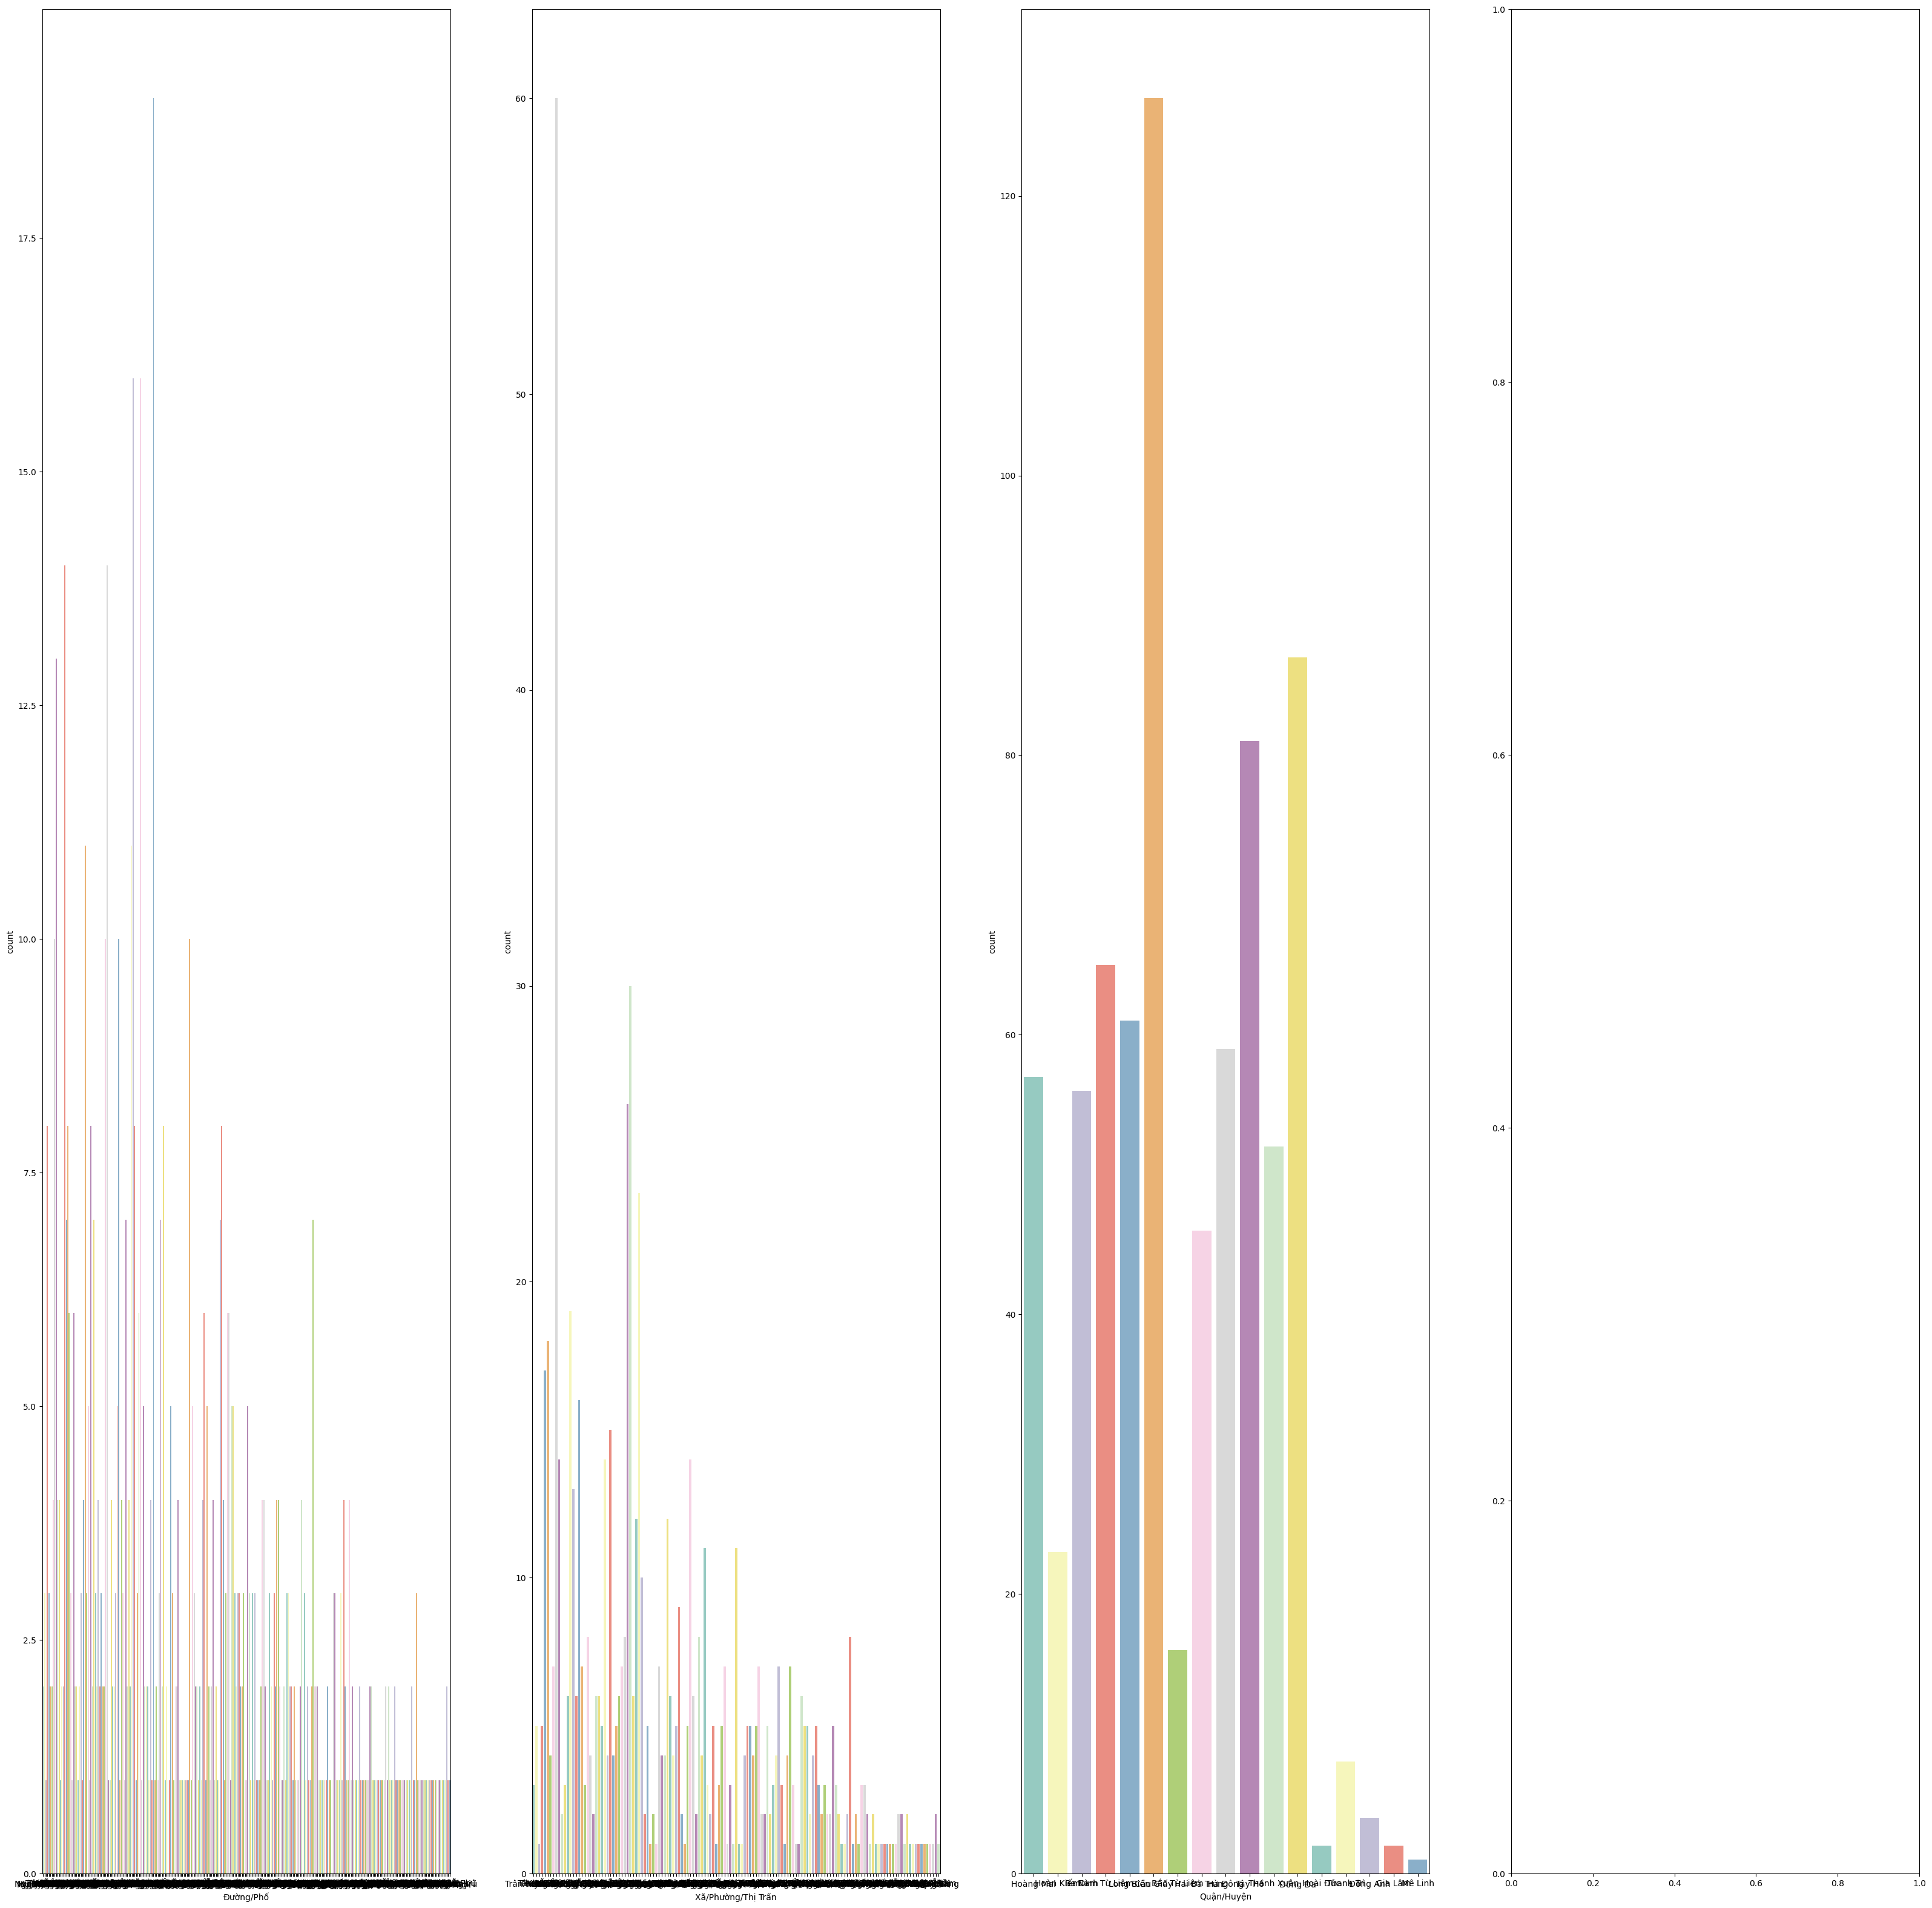

In [104]:
f,ax = plt.subplots(1,4, figsize=(40,40))
k=0
for i in range(4):
    if k<3:
        sns.countplot(x=cat_features[k], data=data_temp, ax=ax[i], palette='Set3')
        k=k+1

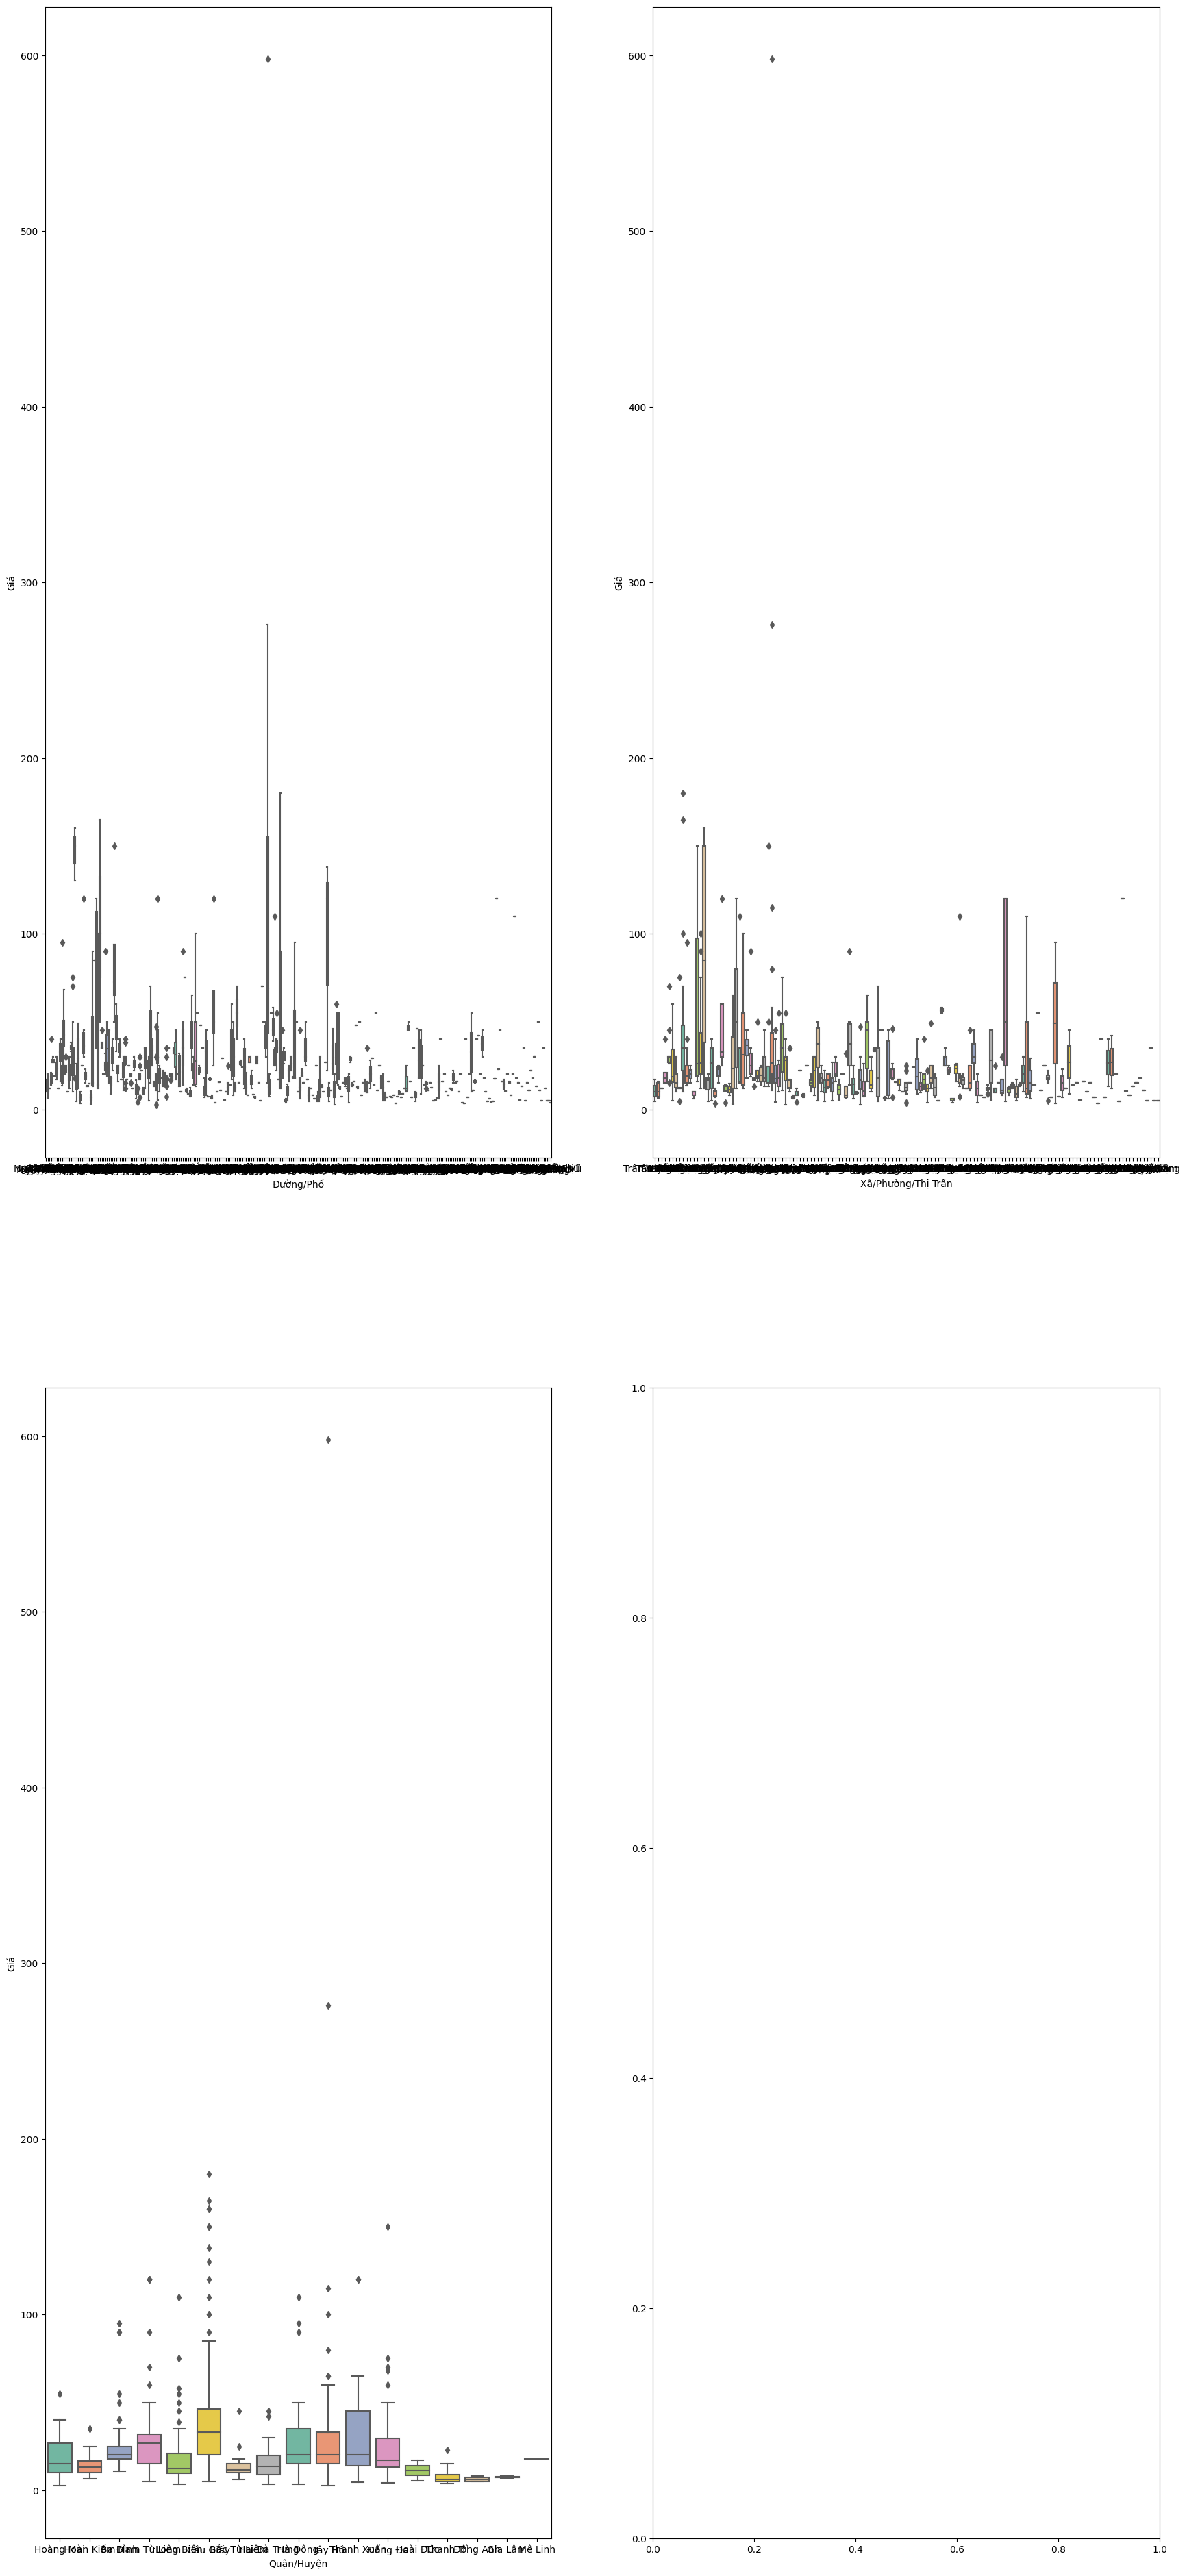

In [105]:
f,ax = plt.subplots(2,2, figsize=(21,48))
k=0
for i in range(2):
    for j in range(2):
        if k<3:
            sns.boxplot(x=cat_features[k], y='Giá', data=data_temp, ax=ax[i][j], palette='Set2')
            k=k+1

In [106]:
X = data_temp.drop(columns='Giá')
y = data_temp['Giá']

In [107]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    # Training Data
    enc = LabelEncoder()
    X[i] =enc.fit_transform(X[i])

<Axes: >

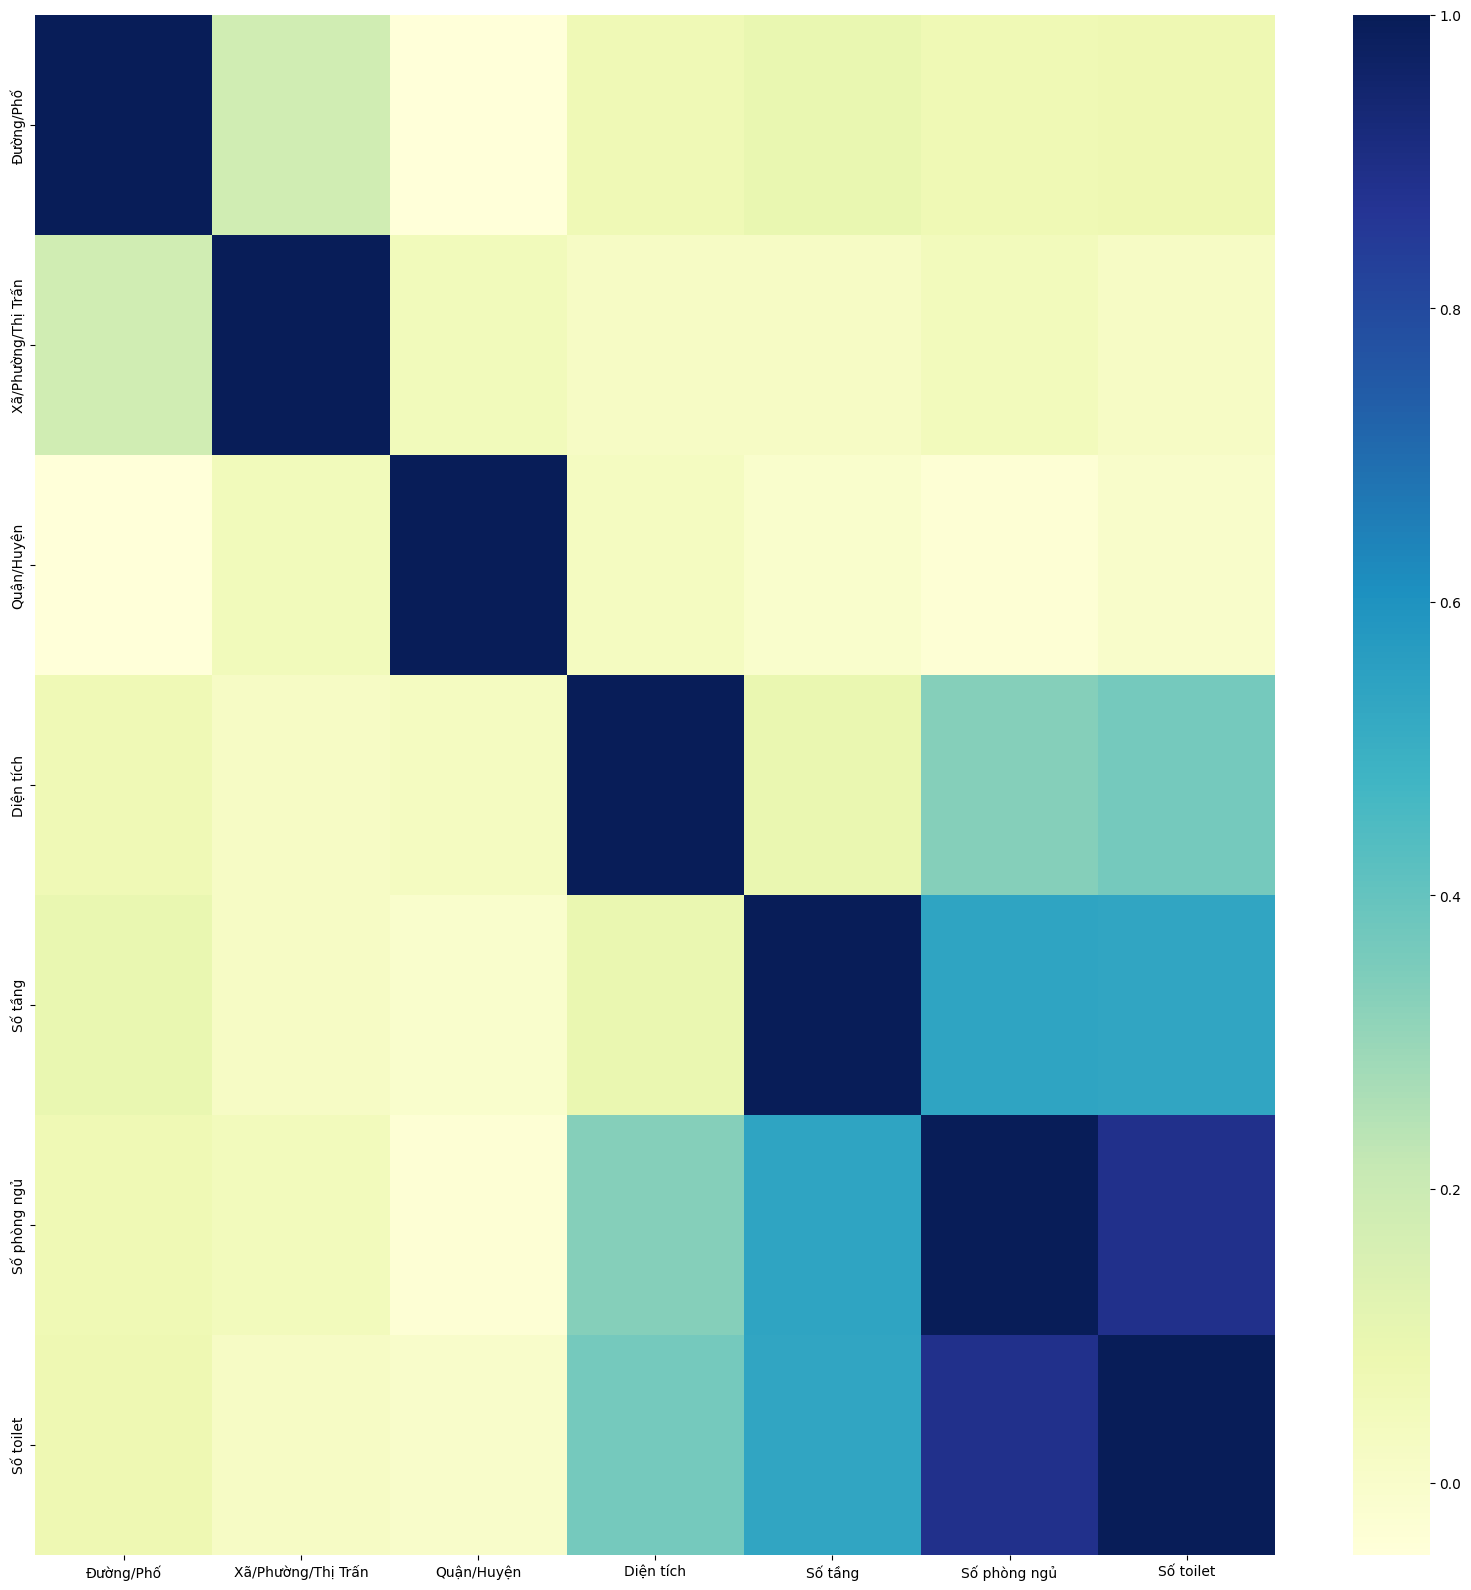

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), cmap='YlGnBu')

In [109]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('clf', SVR())
# ])

# param_grid3 = {
#     'clf__C': [0.1, 1, 10, 100],
#     'clf__gamma': ['scale', 'auto', 0.1, 1, 10],
#     'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
# }

# # param_grid = {'svc__C': [1, 5, 10, 50],
# #               'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# grid_search = GridSearchCV(pipeline, param_grid3, cv=5)
# grid_search.fit(X,y)

# print('Parameters : ', grid_search.best_params_,'\nAccuracy Score : ', grid_search.best_score_)

In [110]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression()

C:\Users\nguye\AppData\Local\Temp\ipykernel_7924\2096269570.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp['dudoan']=model.predict(X)


<Axes: >

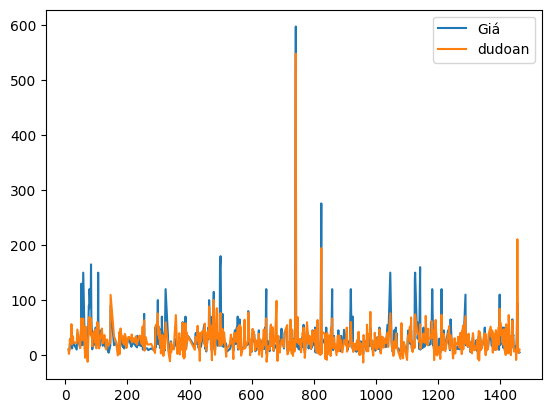

In [111]:
import pickle

filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))


data_temp['dudoan']=model.predict(X)
data_temp[['Giá','dudoan']].plot()

In [115]:
a=np.sqrt(pow(data_temp['dudoan']-data_temp['Giá'],2).mean())
print(a)

18.06407845531382
